# Avaliação 02 - Automação Inteligente
___

**Autor:** Miguel Marques Ferreira

**GitHub**: [https://github.com/Miguel-mmf](https://github.com/Miguel-mmf)

## Parte 1
___
Implementação do trabalho [Fuzzy Logic Simulations for a Smart Air Conditioning System](./9128c270-6c01-4711-a906-e53bf5648c0e.pdf).

### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import simpful as sf
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib import cm
# from plotly.subplots import make_subplots
from plotly import graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

### Sistema Fuzzy

In [2]:
FS = sf.FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful



In [3]:
type(FS)

simpful.simpful.FuzzySystem

### Incialização das variáveis

#### Variáveis de Entrada

In [5]:
# Entrada: Numero de Pessoas
NP1 = sf.FuzzySet(function=sf.Triangular_MF(0, 0, 5), term="Less")
NP2 = sf.FuzzySet(function=sf.Triangular_MF(2, 5, 8) , term="Normal")
NP3 = sf.FuzzySet(function=sf.Triangular_MF(5, 10, 10), term="More")
numberOfPersons = sf.LinguisticVariable([NP1,NP2,NP3], universe_of_discourse=[0,10])
FS.add_linguistic_variable("numberOfPersons", LV=numberOfPersons)

# Entrada: Tamanho do Quarto
RS1 = sf.FuzzySet(function=sf.Triangular_MF(0, 0, 100), term="Small")
RS2 = sf.FuzzySet(function=sf.Triangular_MF(40, 100, 160) , term="Medium")
RS3 = sf.FuzzySet(function=sf.Triangular_MF(100, 200, 200), term="Large")
roomSize = sf.LinguisticVariable([RS1,RS2,RS3], universe_of_discourse=[0,200])
FS.add_linguistic_variable("roomSize", LV=roomSize)

# Entrada: Temperatura Atmosferica
TA1 = sf.FuzzySet(function=sf.Triangular_MF(15, 15, 30.5), term="Cold")
TA2 = sf.FuzzySet(function=sf.Triangular_MF(22, 30.5, 39) , term="Warm")
TA3 = sf.FuzzySet(function=sf.Triangular_MF(30.5, 45, 45), term="Hot")
atmosphericTemperature = sf.LinguisticVariable([TA1,TA2,TA3], universe_of_discourse=[15,45])
FS.add_linguistic_variable("atmosphericTemperature", LV=atmosphericTemperature)

#### Variáveis de saída

In [6]:
# Saida: Temperatura do Quarto
TQ1 = sf.FuzzySet(function=sf.Triangular_MF(16,16,23), term='Low')
TQ2 = sf.FuzzySet(function=sf.Triangular_MF(19,23,27), term='Medium')
TQ3 = sf.FuzzySet(function=sf.Triangular_MF(23,30,30), term='High')
roomTemperature = sf.LinguisticVariable([TQ1,TQ2,TQ3], universe_of_discourse=[16,30])
FS.add_linguistic_variable("roomTemperature", LV=roomTemperature)

# Saida: Capacidade de Refrigeração
CP1 = sf.FuzzySet(function=sf.Triangular_MF(3500,3500,4600), term='VeryCold')
CP2 = sf.FuzzySet(function=sf.Triangular_MF(4100,4850,5600), term='Cold')
CP3 = sf.FuzzySet(function=sf.Triangular_MF(5405,6200,6200), term='warm')
coolingCapacity = sf.LinguisticVariable([CP1,CP2,CP3], universe_of_discourse=[3500,6200])
FS.add_linguistic_variable("coolingCapacity", LV=coolingCapacity)

# Saida: Potencia consumida
PC1 = sf.FuzzySet(function=sf.Triangular_MF(1100,1100,1440), term='Low')
PC2 = sf.FuzzySet(function=sf.Triangular_MF(1275,1540,1820), term='Medium')
PC3 = sf.FuzzySet(function=sf.Triangular_MF(1725,2000,2000), term='High')
powerConsumption = sf.LinguisticVariable([PC1,PC2,PC3], universe_of_discourse=[1100,2000])
FS.add_linguistic_variable("powerConsumption", LV=powerConsumption)

# Saida: Inclinação
I1 = sf.FuzzySet(function=sf.Triangular_MF(0,0,12.5), term='Low')
I2 = sf.FuzzySet(function=sf.Triangular_MF(4,15.5,27), term='Centre')
I3 = sf.FuzzySet(function=sf.Triangular_MF(19,30,30), term='High')
tiltsPosition = sf.LinguisticVariable([I1,I2,I3], universe_of_discourse=[0,30])
FS.add_linguistic_variable("tiltsPosition", LV=tiltsPosition)

# Saida: Velocidade do Vento
VV1 = sf.FuzzySet(function=sf.Triangular_MF(600,600,840), term='Low')
VV2 = sf.FuzzySet(function=sf.Triangular_MF(678,900,1140), term='Medium')
VV3 = sf.FuzzySet(function=sf.Triangular_MF(960,1200,1200), term='Fast')
fanSpeed = sf.LinguisticVariable([VV1,VV2,VV3], universe_of_discourse=[600,1200])
FS.add_linguistic_variable("fanSpeed", LV=fanSpeed)

In [7]:
outputs = dict(
    roomTemperature = roomTemperature,
    coolingCapacity = coolingCapacity,
    powerConsumption = powerConsumption,
    tiltsPosition = tiltsPosition,
    fanSpeed = fanSpeed
)

In [8]:
FS._lvs.keys()

odict_keys(['numberOfPersons', 'roomSize', 'atmosphericTemperature', 'roomTemperature', 'coolingCapacity', 'powerConsumption', 'tiltsPosition', 'fanSpeed'])

In [9]:
FS._lvs['numberOfPersons']._FSlist[0]._funpointer.__getattribute__('_c')

5

### Visualização gráfica

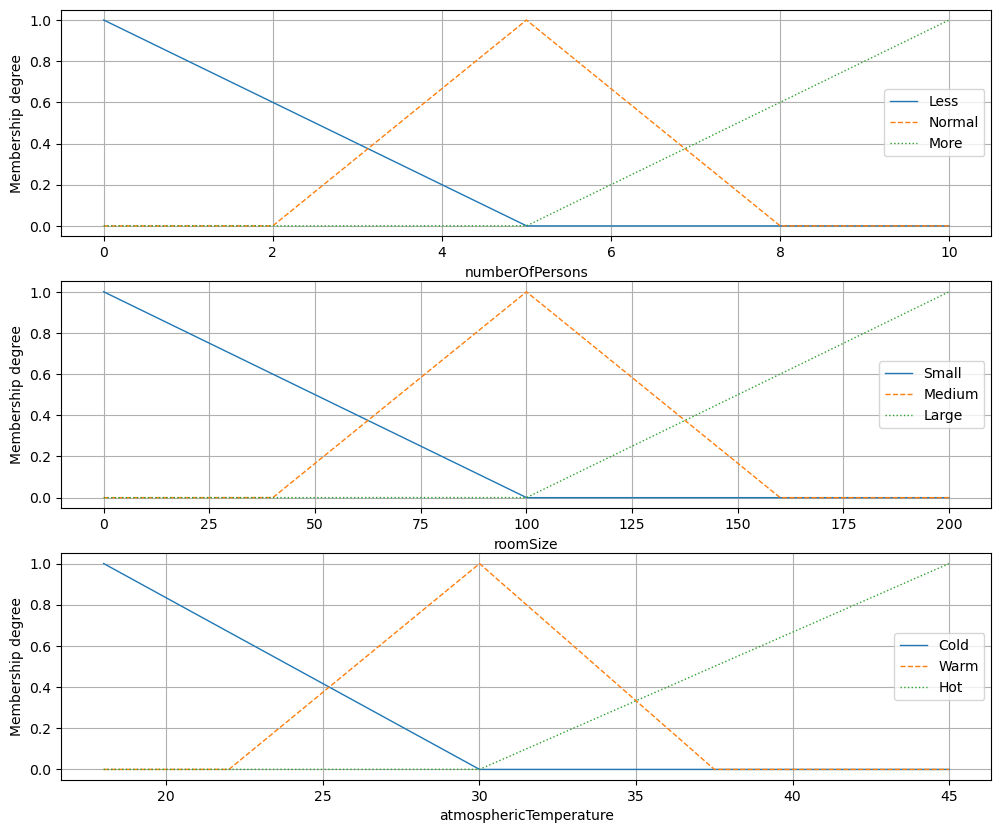

In [10]:
fig, axs = plt.subplots(3,1, figsize=(12,10))
for var_index, var_name in enumerate(list(FS._lvs.keys())[:3]):
    FS.plot_variable(var_name=var_name, ax=axs[var_index], outputfile=f"./images/{var_name}.png")
    axs[var_index].grid()

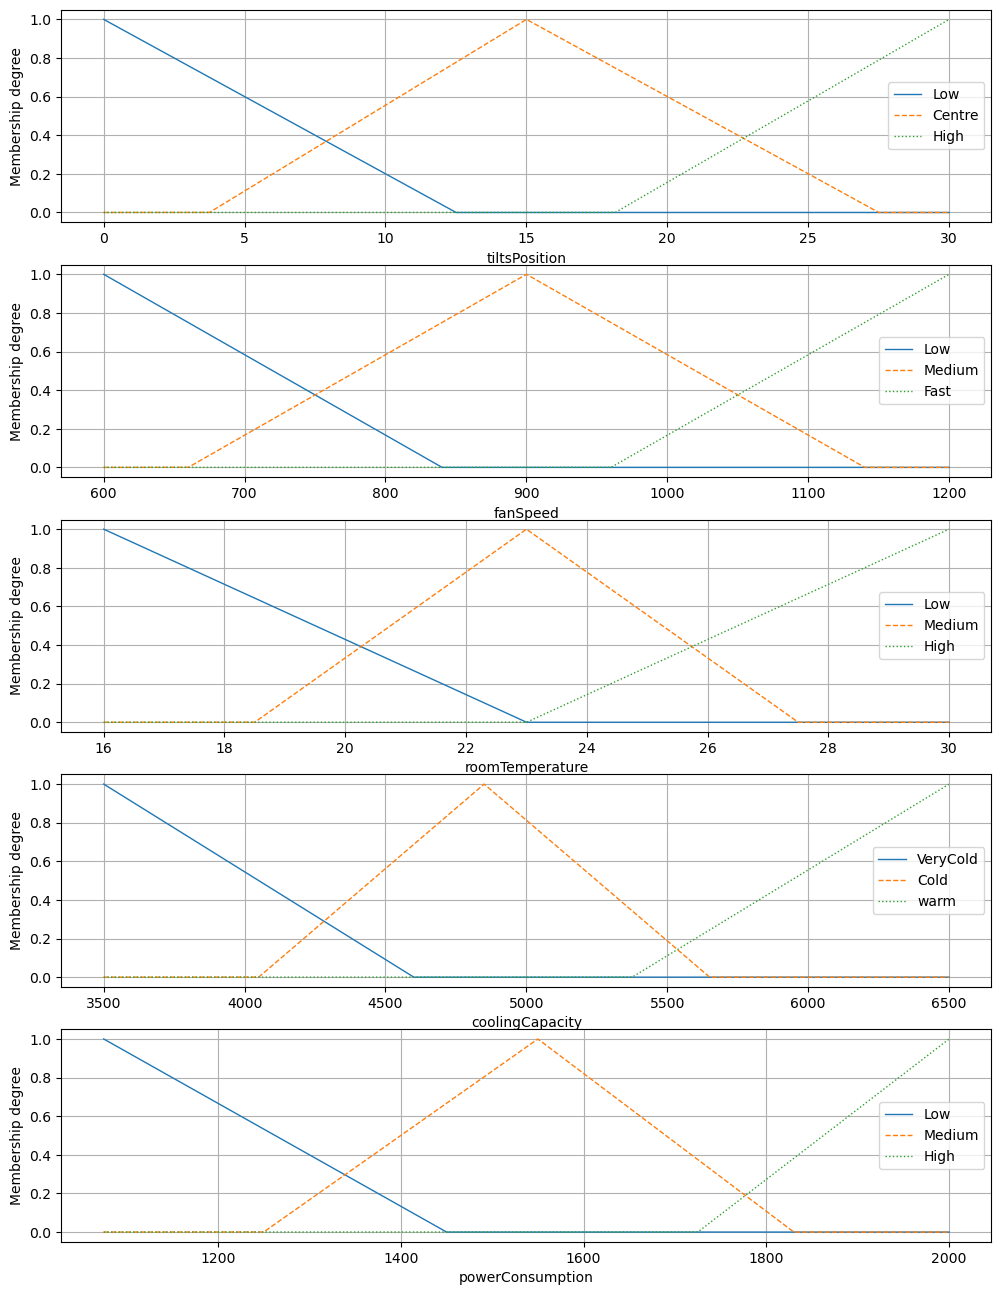

In [11]:
fig, axs = plt.subplots(5,1, figsize=(12,16))
for var_index, var_name in enumerate(list(FS._lvs.keys())[3:]):
    FS.plot_variable(var_name=var_name, ax=axs[var_index-3], outputfile=f"./images/{var_name}.png")
    axs[var_index-3].grid()

### Criação de regras

As regras devem seguir a a formatação abaixo:

"**IF** (Entrada_1 **IS** ruim) **AND** (Entrada_2 **IS** bom) **THEN** (Saida **IS** medio)"

In [10]:
regras = pd.read_csv("regras.csv")
regras.set_index("Numero", inplace=True)

In [11]:
regras.columns

Index(['NUMBEROFPERSON', 'ROOMSIZE', 'ATMOSSPHERICTEMPERATURE',
       'ROOMTEMPERATURE', 'COOLINGCAPACITY', 'POWERCONSUMPTION',
       'TILTSPOSITION', 'FANSPEED'],
      dtype='object')

In [12]:
for col in regras.columns:
    print(f'{col}: {regras[col].unique()}')

NUMBEROFPERSON: ['Less' 'Normal' 'More']
ROOMSIZE: ['Small' 'Medium' 'Large' 'Less' 'Normal' 'More']
ATMOSSPHERICTEMPERATURE: ['Cold' 'Warm' 'Hot']
ROOMTEMPERATURE: ['Low' 'Medium' 'High']
COOLINGCAPACITY: ['VeryCold' 'Cold' 'warm' 'Very cold']
POWERCONSUMPTION: ['Low' 'Medium' 'High']
TILTSPOSITION: ['Low' 'Centre' 'High']
FANSPEED: ['Low' 'Medium' 'Fast']


In [13]:
regras['COOLINGCAPACITY'] = regras['COOLINGCAPACITY'].apply(lambda x: x.replace("Verycold", "VeryCold")).replace('Very cold', "VeryCold")
regras['ROOMSIZE'] = regras['ROOMSIZE'].apply(lambda x: x.replace("Less", "Small")).apply(lambda x: x.replace("Normal", "Medium")).apply(lambda x: x.replace("More", "Large"))

In [14]:
dict_rules = dict()
for col in regras.columns:
    dict_rules[col] = regras[col].unique().tolist()
    print(f'{col}: {regras[col].unique()}')

NUMBEROFPERSON: ['Less' 'Normal' 'More']
ROOMSIZE: ['Small' 'Medium' 'Large']
ATMOSSPHERICTEMPERATURE: ['Cold' 'Warm' 'Hot']
ROOMTEMPERATURE: ['Low' 'Medium' 'High']
COOLINGCAPACITY: ['VeryCold' 'Cold' 'warm']
POWERCONSUMPTION: ['Low' 'Medium' 'High']
TILTSPOSITION: ['Low' 'Centre' 'High']
FANSPEED: ['Low' 'Medium' 'Fast']


In [15]:
rules = list()
rules_for_matlabt = list()
for i, row in regras.iterrows():
    rules.append(
        f"IF (numberOfPersons IS {row['NUMBEROFPERSON']}) AND (roomSize IS {row['ROOMSIZE']}) AND (atmosphericTemperature IS {row['ATMOSSPHERICTEMPERATURE']}) THEN (roomTemperature IS {row['ROOMTEMPERATURE']})(coolingCapacity IS {row['COOLINGCAPACITY']})(powerConsumption IS {row['POWERCONSUMPTION']})(tiltsPosition IS {row['TILTSPOSITION']})(fanSpeed IS {row['FANSPEED']})"
    )
    rules_for_matlabt.append(
        f"{dict_rules['NUMBEROFPERSON'].index(row['NUMBEROFPERSON'])+1} {dict_rules['ROOMSIZE'].index(row['ROOMSIZE'])+1} {dict_rules['ATMOSSPHERICTEMPERATURE'].index(row['ATMOSSPHERICTEMPERATURE'])+1}, {dict_rules['ROOMTEMPERATURE'].index(row['ROOMTEMPERATURE'])+1} {dict_rules['COOLINGCAPACITY'].index(row['COOLINGCAPACITY'])+1} {dict_rules['POWERCONSUMPTION'].index(row['POWERCONSUMPTION'])+1} {dict_rules['TILTSPOSITION'].index(row['TILTSPOSITION'])+1} {dict_rules['FANSPEED'].index(row['FANSPEED'])+1} (1) : 1"
    )

print(len(rules))
print(len(rules_for_matlabt))

27
27


In [16]:
FS.add_rules(rules)

In [17]:
len(FS._rules)

27

#### Verificando regras repetidas

In [18]:
unique_rules = list(set(rules))

if len(unique_rules) != len(rules):
    print("There are repeated rules")
    for rule in unique_rules:
        if rules.count(rule) > 1:
            print(f"Rule: {rule} - {rules.count(rule)} times")

There are repeated rules
Rule: IF (numberOfPersons IS Less) AND (roomSize IS Small) AND (atmosphericTemperature IS Cold) THEN (roomTemperature IS Low)(coolingCapacity IS VeryCold)(powerConsumption IS Low)(tiltsPosition IS Low)(fanSpeed IS Low) - 3 times
Rule: IF (numberOfPersons IS Normal) AND (roomSize IS Medium) AND (atmosphericTemperature IS Warm) THEN (roomTemperature IS Medium)(coolingCapacity IS Cold)(powerConsumption IS Medium)(tiltsPosition IS Centre)(fanSpeed IS Medium) - 3 times
Rule: IF (numberOfPersons IS More) AND (roomSize IS Large) AND (atmosphericTemperature IS Hot) THEN (roomTemperature IS High)(coolingCapacity IS warm)(powerConsumption IS High)(tiltsPosition IS High)(fanSpeed IS Fast) - 3 times


In [19]:
unique_rules_for_matlabt = list(set(rules_for_matlabt))

if len(unique_rules_for_matlabt) != len(rules_for_matlabt):
    print("There are repeated rules")
    for rule in unique_rules_for_matlabt:
        if rules_for_matlabt.count(rule) > 1:
            print(f"Rule: {rule} - {rules_for_matlabt.count(rule)} times")

There are repeated rules
Rule: 2 2 2, 2 2 2 2 2 (1) : 1 - 3 times
Rule: 1 1 1, 1 1 1 1 1 (1) : 1 - 3 times
Rule: 3 3 3, 3 3 3 3 3 (1) : 1 - 3 times


In [20]:
FS._lvs.keys()

odict_keys(['numberOfPersons', 'roomSize', 'atmosphericTemperature', 'roomTemperature', 'coolingCapacity', 'powerConsumption', 'tiltsPosition', 'fanSpeed'])

### Teste com o exemplo do artigo

In [21]:
FS.set_variable('numberOfPersons', 5)
FS.set_variable('roomSize', 100)
FS.set_variable('atmosphericTemperature', 30.5)
# FS.set_output_function('roomTemperature')
FS.Mamdani_inference(subdivisions=1000, terms=list(FS._lvs.keys())[:4])

Exception: ERROR: Variable atmosphericTemperature does not appear in any consequent.

### Superfície Fuzzy

Obs.: A biblioteca `simpful` não permite criar a superfície para sistemas Fuzzy com mais de uma saída. Para contornar esse problema, vou gerar subsistemas Fuzzy aproveitando as mesmas entradas e regras para uma única saída por vez.

In [23]:
print(f"Exemplo do artigo - Valores para a entrada [5;100;30.5]")

for output in outputs.keys():
    aux_FS = sf.FuzzySystem(show_banner=False)
    aux_FS.add_linguistic_variable("numberOfPersons", LV=numberOfPersons)
    aux_FS.add_linguistic_variable("roomSize", LV=roomSize)
    aux_FS.add_linguistic_variable("atmosphericTemperature", LV=atmosphericTemperature)
    aux_FS.add_linguistic_variable(output, LV=outputs[output])
    
    aux_rules = list()
    for i, row in regras.iterrows():
        aux_rules.append(
            f"IF (numberOfPersons IS {row['NUMBEROFPERSON']}) AND (roomSize IS {row['ROOMSIZE']}) AND (atmosphericTemperature IS {row['ATMOSSPHERICTEMPERATURE']}) THEN ({output} IS {row[output.upper()]})"
        )
    aux_FS.add_rules(aux_rules)
    
    ## Replicando o exemplo do artigo
    aux_FS.set_variable('numberOfPersons', 5)
    aux_FS.set_variable('roomSize', 100)
    aux_FS.set_variable('atmosphericTemperature', 30.5)
    value_defuzzy = aux_FS.Mamdani_inference(subdivisions=1000, ignore_warnings=True)[output]
    print(f"{output}: {value_defuzzy}")

Exemplo do artigo - Valores para a entrada [5;100;30.5]
roomTemperature: 22.999999999999986
coolingCapacity: 4849.999999999999
powerConsumption: 1544.9999628030375
tiltsPosition: 15.499997255024686
fanSpeed: 905.9999879639158


Exemplo do artigo - Valores para a entrada [5;100;3-.5]
roomTemperature: 22.999999999999986
coolingCapacity: 4849.999529403672
powerConsumption: 1543.3059180057896
tiltsPosition: 15.418406105307165
fanSpeed: 899.9999999999995


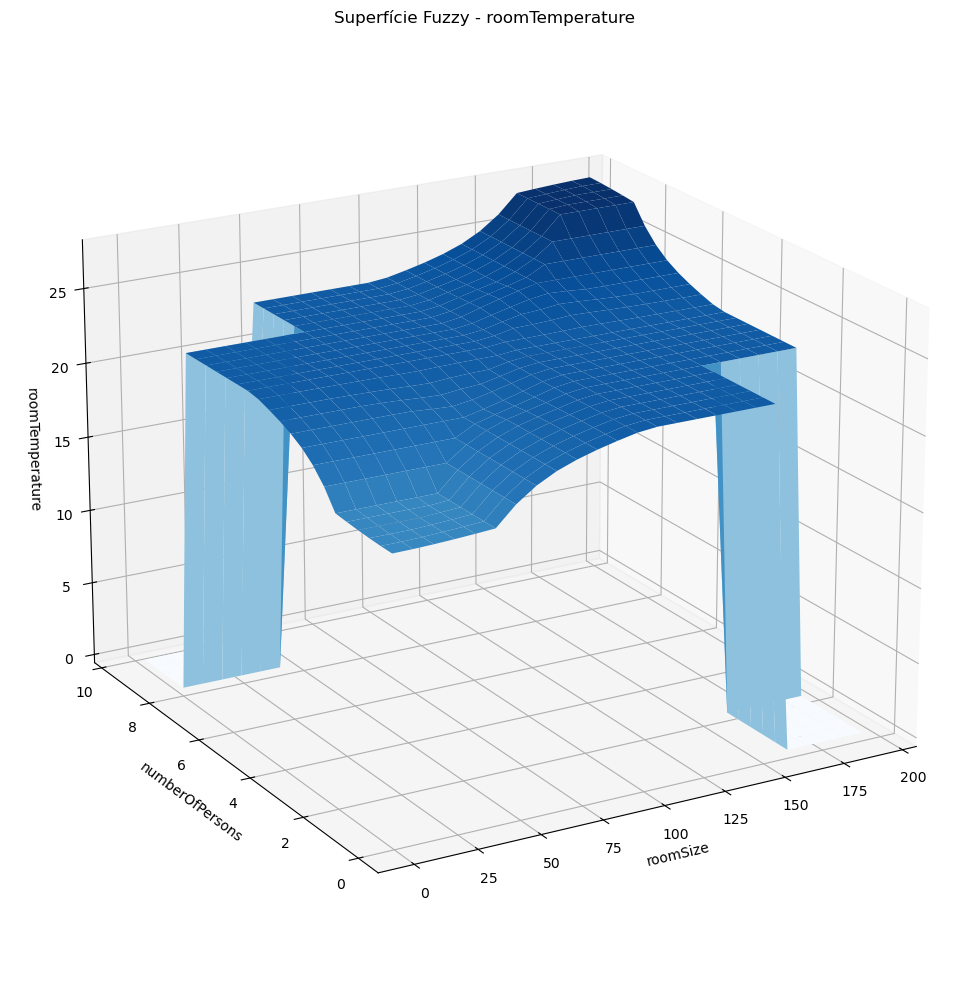

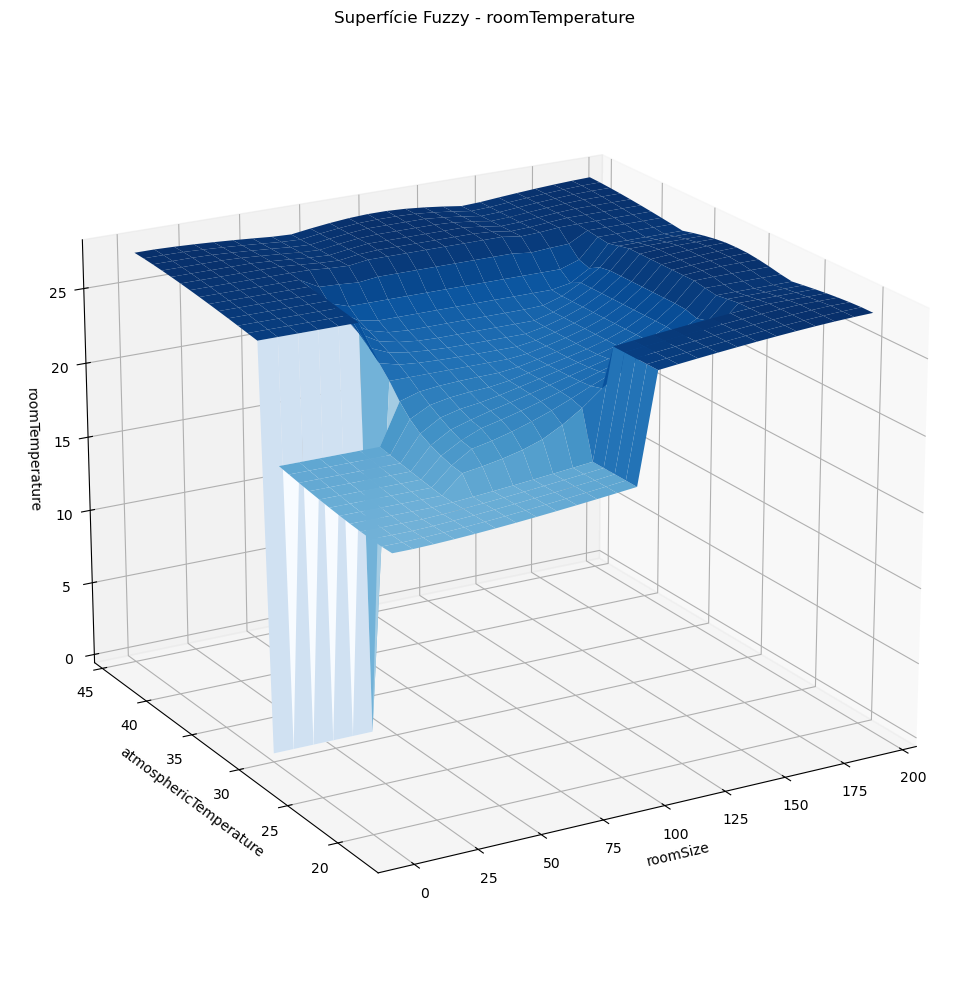

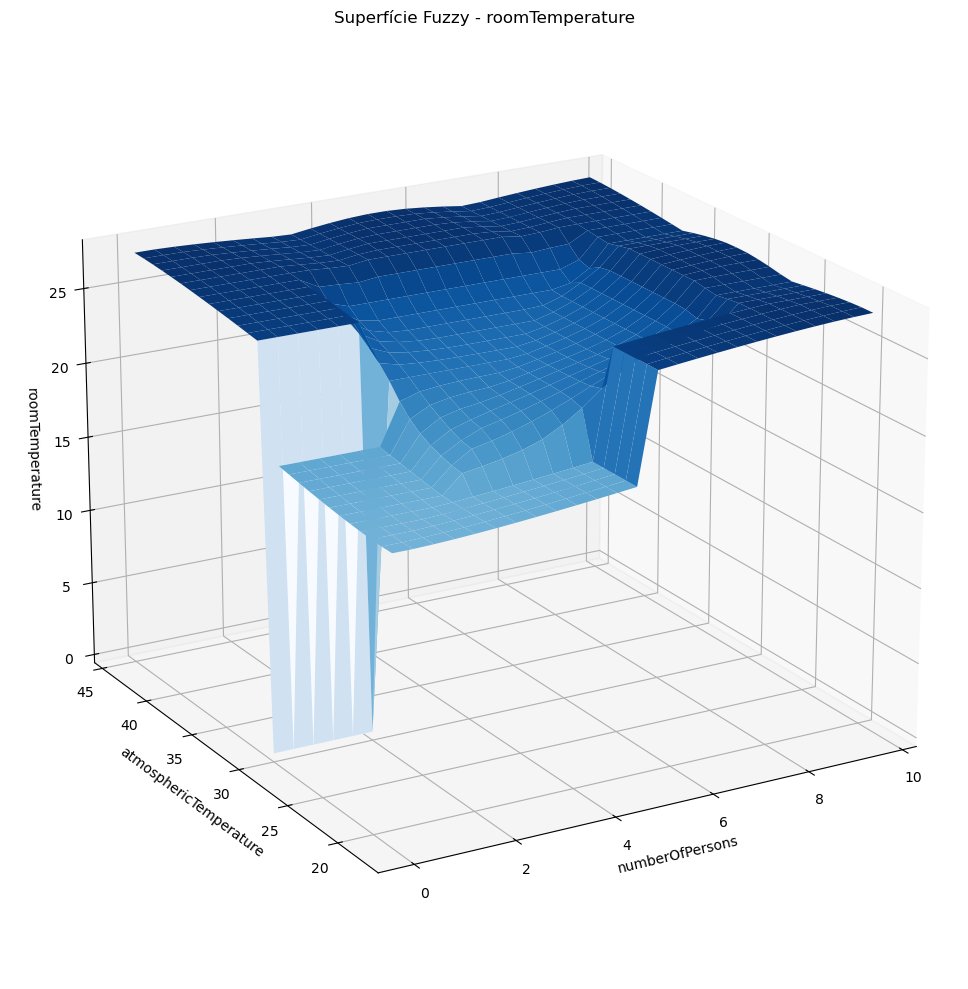

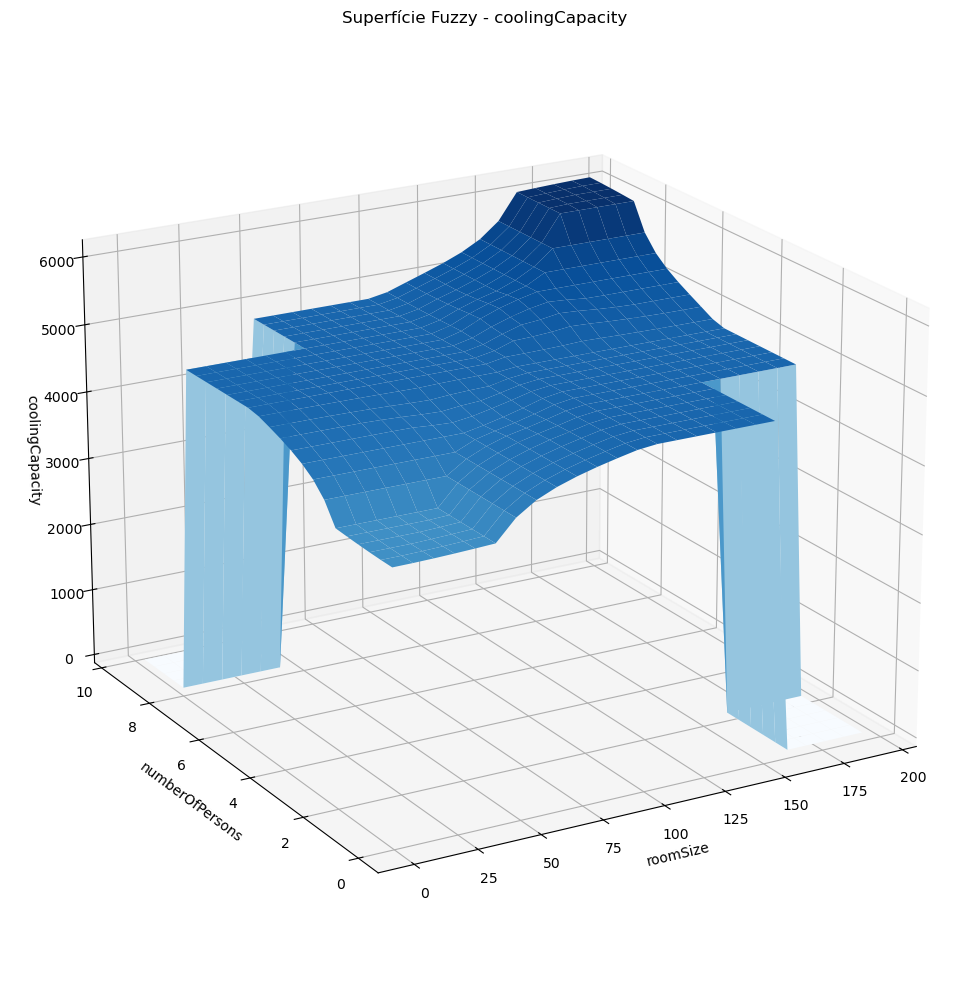

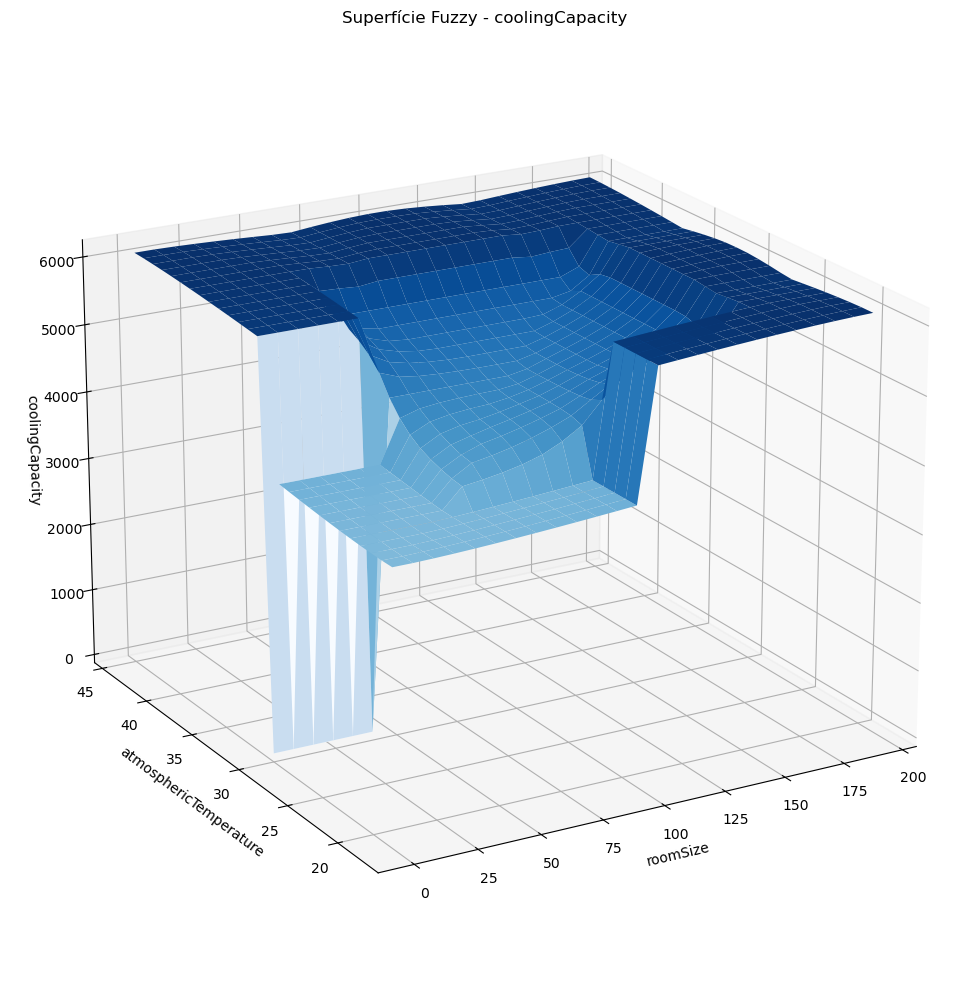

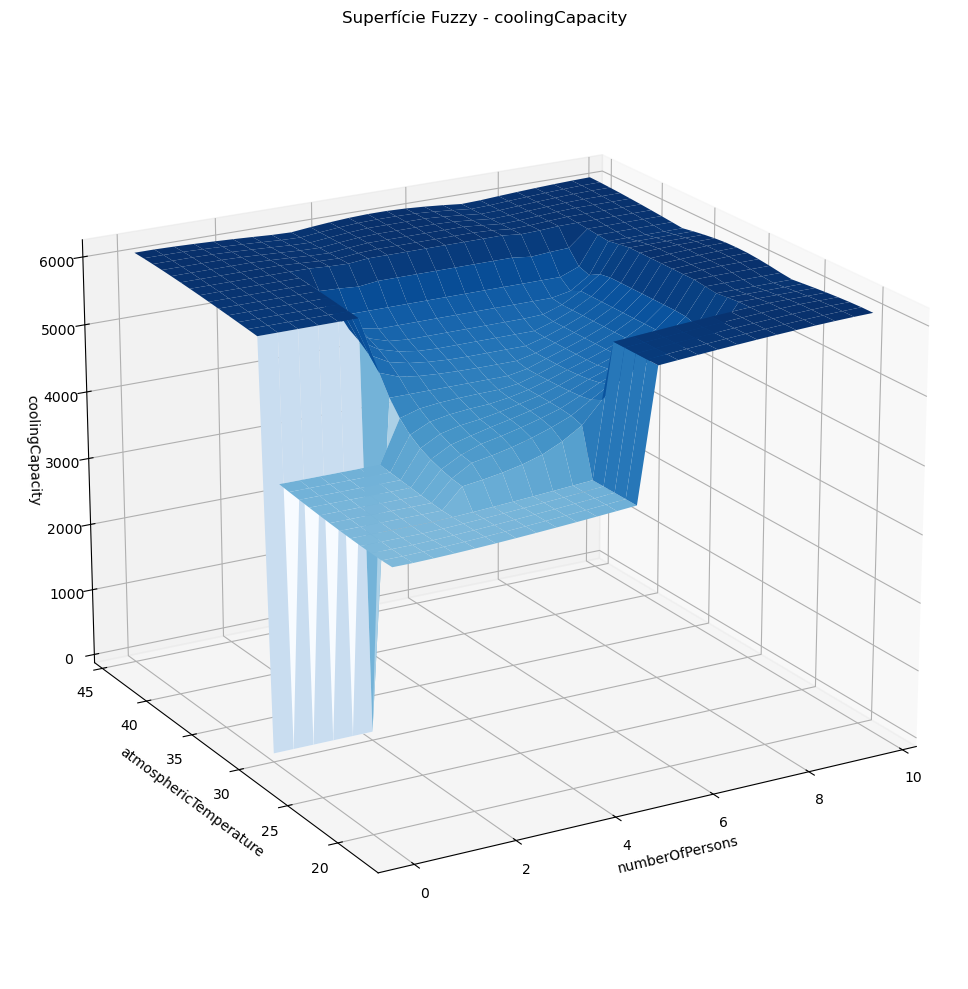

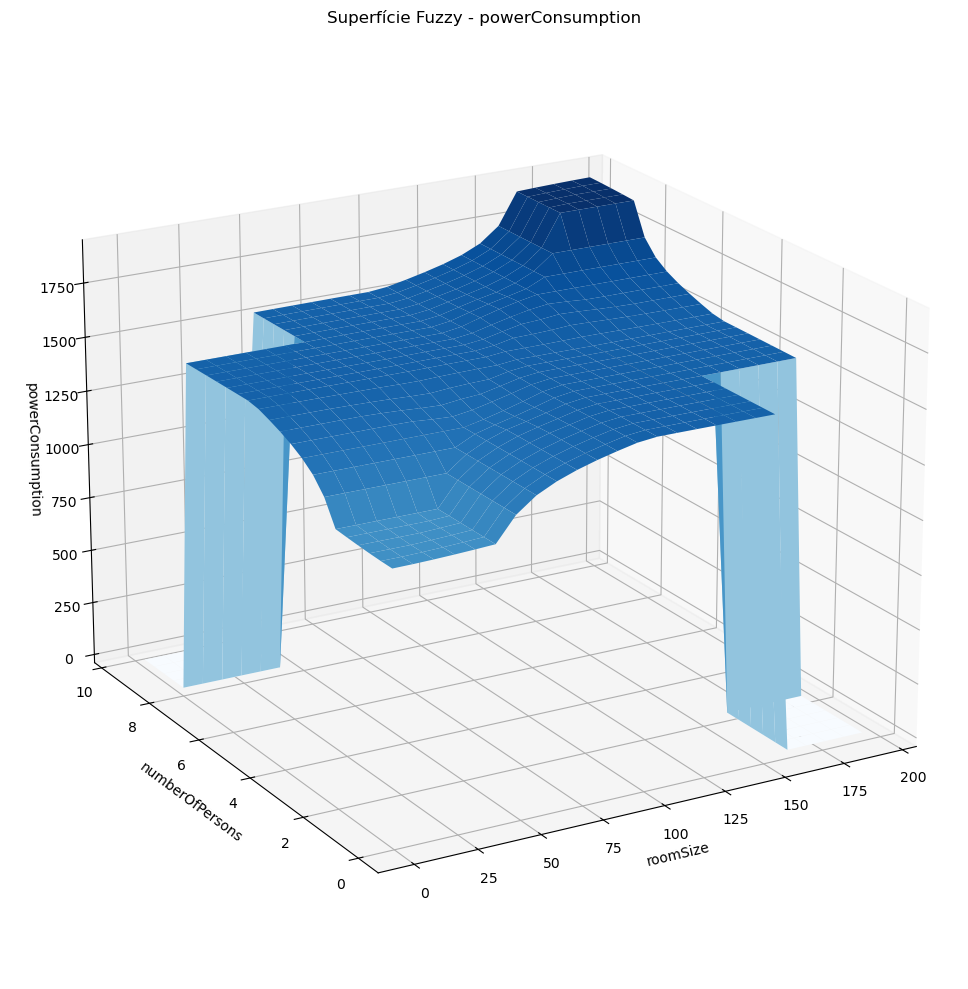

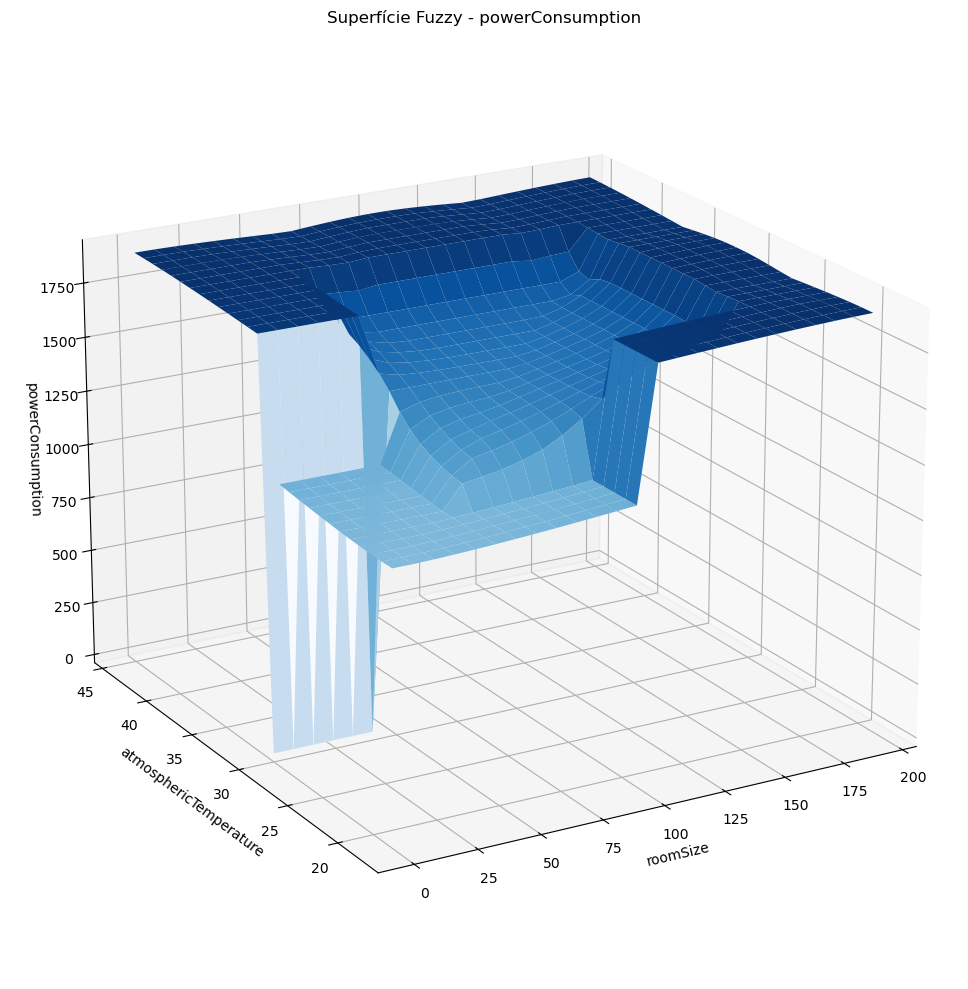

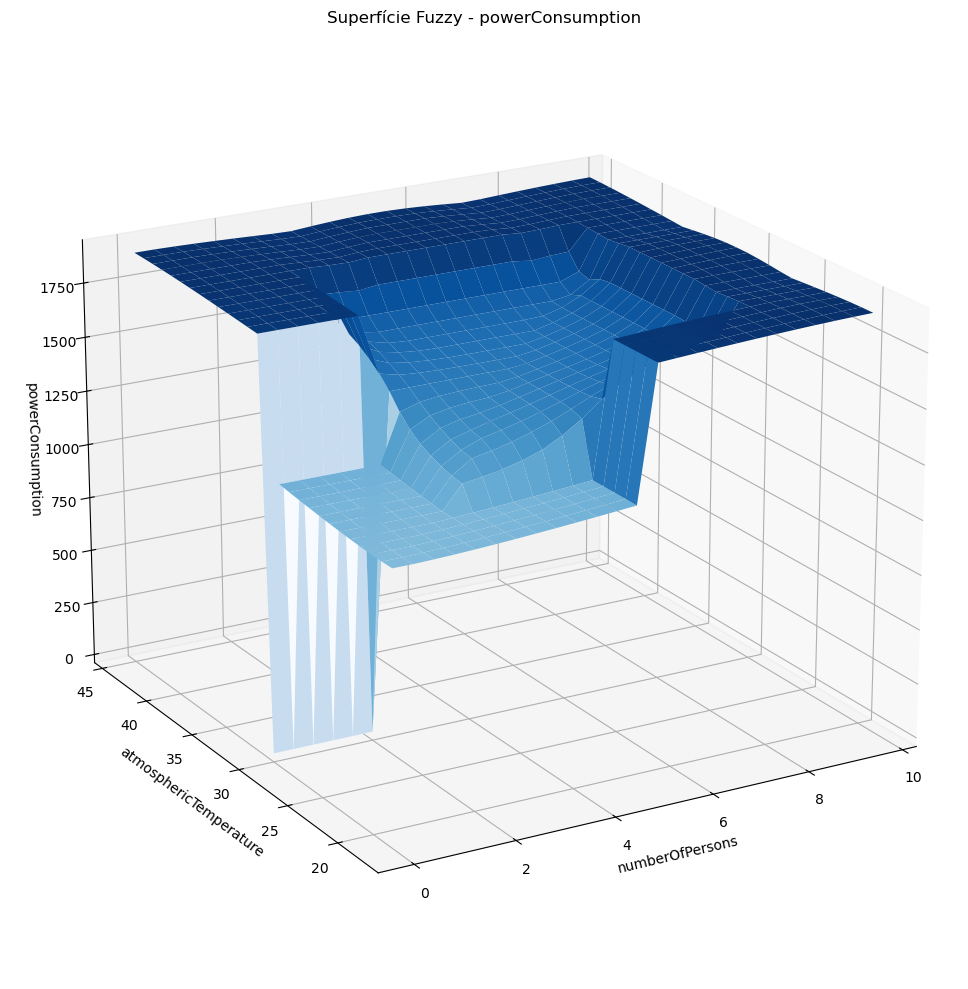

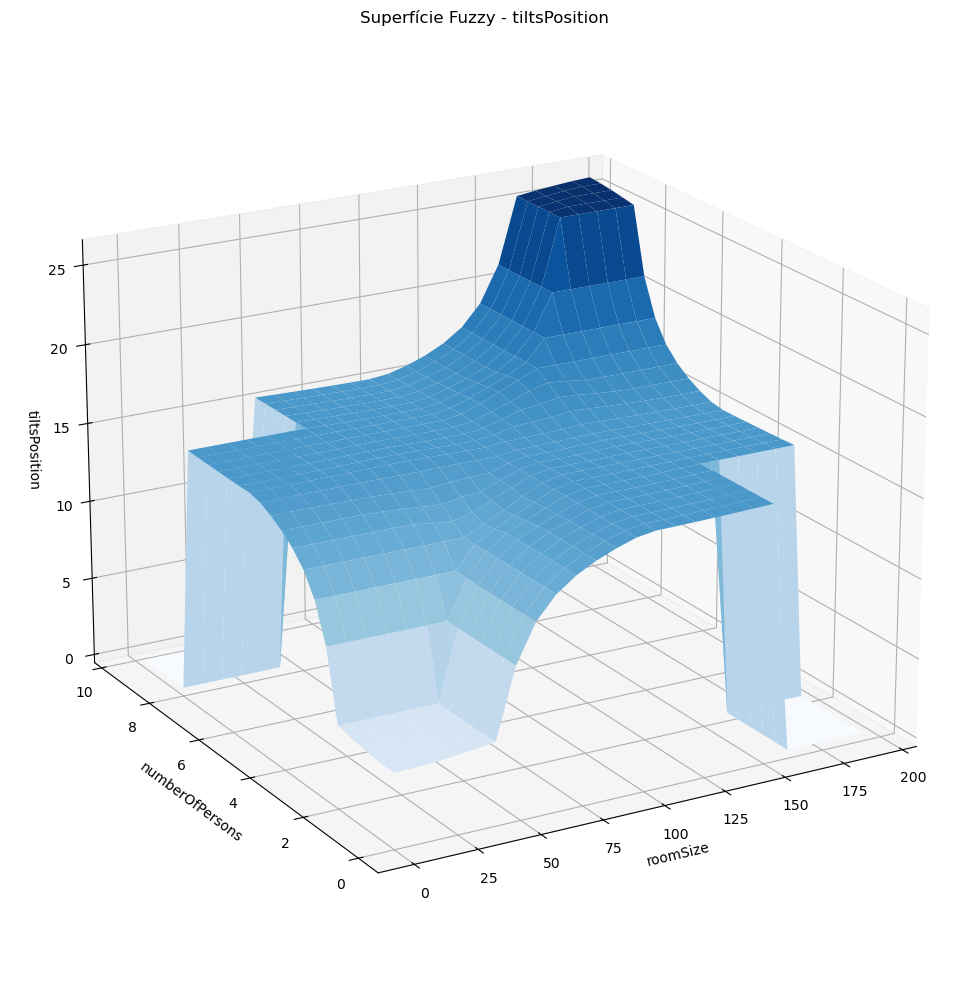

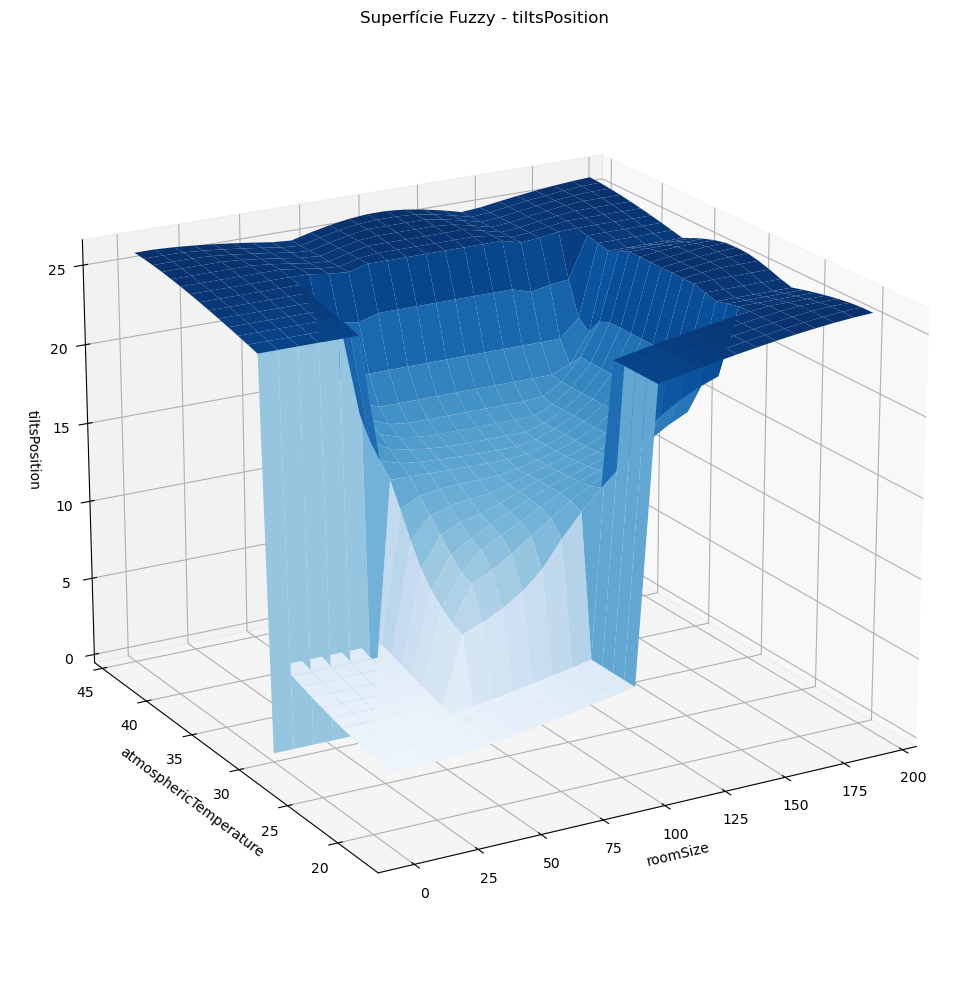

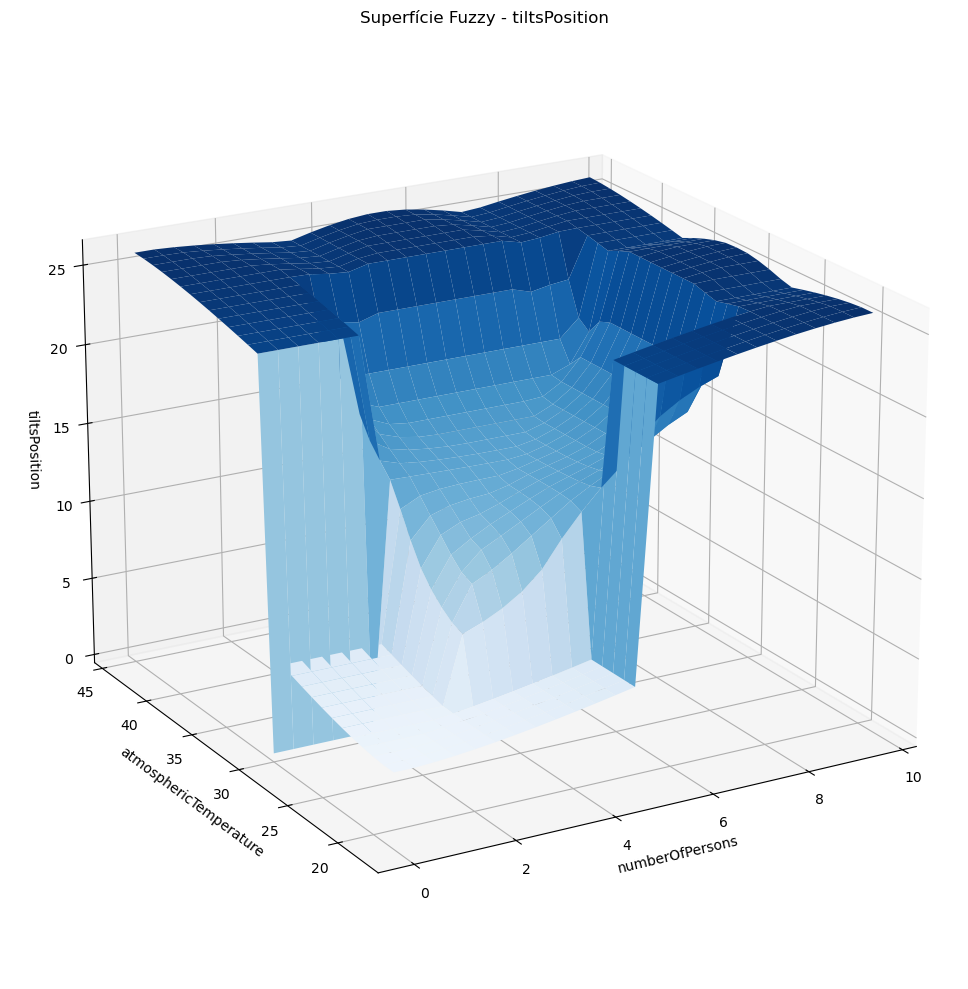

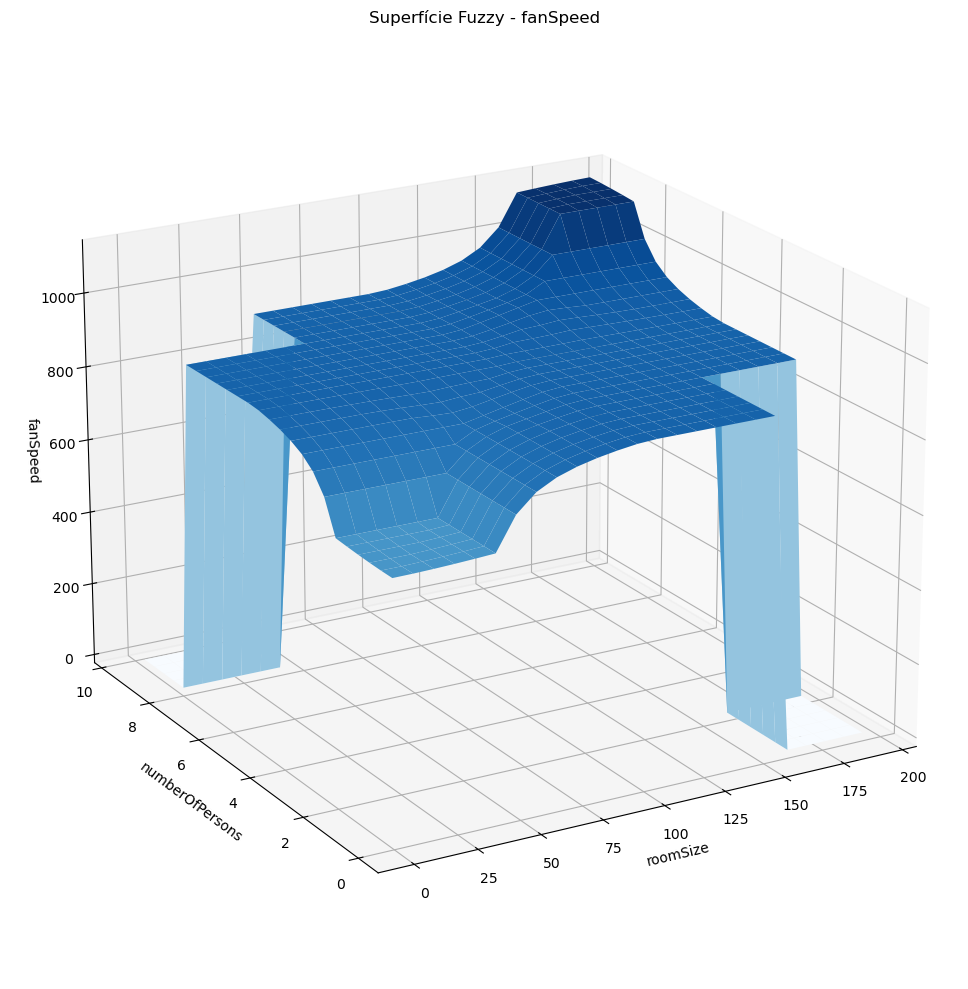

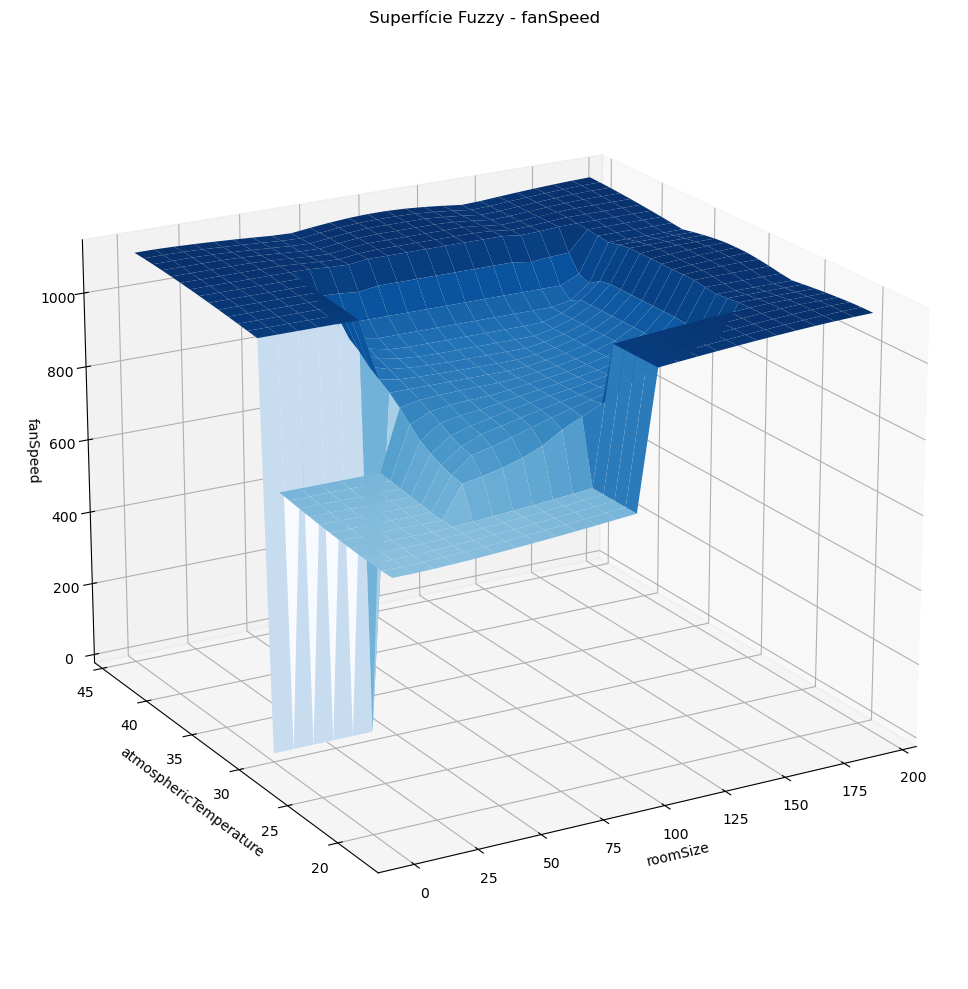

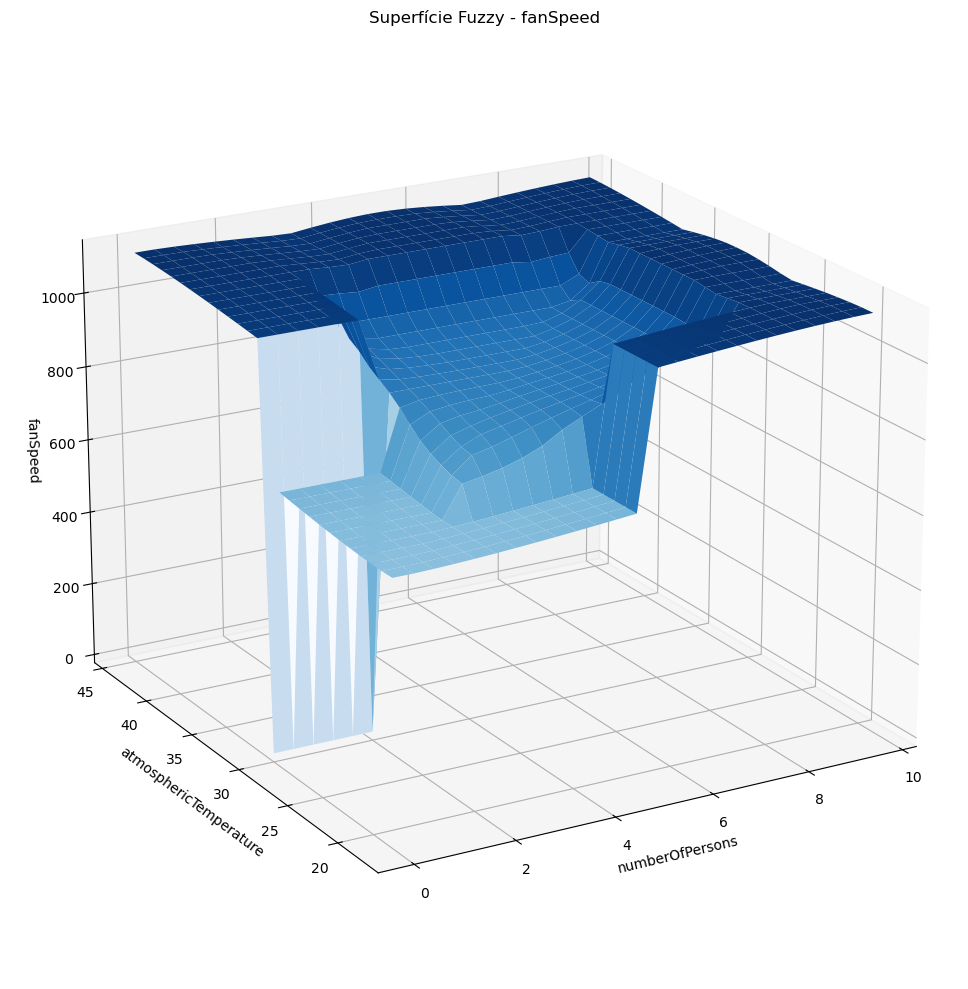

In [42]:
print(f"Exemplo do artigo - Valores para a entrada [5;100;30.5]")

for output in outputs.keys():
    aux_FS = sf.FuzzySystem(show_banner=False)
    aux_FS.add_linguistic_variable("numberOfPersons", LV=numberOfPersons)
    aux_FS.add_linguistic_variable("roomSize", LV=roomSize)
    aux_FS.add_linguistic_variable("atmosphericTemperature", LV=atmosphericTemperature)
    aux_FS.add_linguistic_variable(output, LV=outputs[output])
    
    aux_rules = list()
    for i, row in regras.iterrows():
        aux_rules.append(
            f"IF (numberOfPersons IS {row['NUMBEROFPERSON']}) AND (roomSize IS {row['ROOMSIZE']}) AND (atmosphericTemperature IS {row['ATMOSSPHERICTEMPERATURE']}) THEN ({output} IS {row[output.upper()]})"
        )
    aux_FS.add_rules(aux_rules)
    
    ## Plotting the surface [roomSize, numberOfPersons, output]
    X_room_size = np.arange(0, 200, 8)
    X_len = len(X_room_size)
    Y_number_person = np.arange(0, 10, 0.4)
    Y_len_number_person  = len(Y_number_person)
    Y_atmospheric_temperature = np.arange(18, 45, 1)
    Y_len_atmospheric_temperature = len(Y_atmospheric_temperature)
    
    Z = np.arange(outputs[output]._universe_of_discourse[0], outputs[output]._universe_of_discourse[1], 1)
    Z_len = len(Z)

    Z_decisao = np.zeros((X_len, Y_len_number_person))
    for i in range(X_len):
        for j in range(Y_len_number_person):
            aux_FS.set_variable('roomSize', X_room_size[i])
            aux_FS.set_variable('numberOfPersons', Y_number_person[j])
            aux_FS.set_variable('atmosphericTemperature', 30)
            Z_decisao[i, j] = aux_FS.Mamdani_inference(subdivisions=1000, ignore_warnings=True)[output]
            
    X, Y = np.meshgrid(X_room_size, Y_number_person)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z_decisao.T, cmap=cm.Blues)
    ax.set_xlabel('roomSize')
    ax.set_ylabel('numberOfPersons')
    ax.set_zlabel(output)
    plt.title('Superfície Fuzzy - ' + output)
    plt.tight_layout()
    ax.view_init(azim=-120, elev=20)
    plt.savefig(
        f"./images/{output}_surface.png",
        format='png',
        bbox_inches='tight'
    )
    
    ## Plotting the surface [roomSize, atmosphericTemperature, output]
    Z_decisao = np.zeros((X_len, Y_len_atmospheric_temperature))

    for i in range(X_len):
        for j in range(Y_len_atmospheric_temperature):
            aux_FS.set_variable('roomSize', X_room_size[i])
            aux_FS.set_variable('atmosphericTemperature', Y_atmospheric_temperature[j])
            Z_decisao[i, j] = aux_FS.Mamdani_inference(subdivisions=1000, ignore_warnings=True)[output]
            
    X, Y = np.meshgrid(X_room_size, Y_atmospheric_temperature)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z_decisao.T, cmap=cm.Blues)
    ax.set_xlabel('roomSize')
    ax.set_ylabel('atmosphericTemperature')
    ax.set_zlabel(output)
    plt.title('Superfície Fuzzy - ' + output)
    plt.tight_layout()
    ax.view_init(azim=-120, elev=20)
    plt.savefig(
        f"./images/{output}_surface2.png",
        format='png',
        bbox_inches='tight'
    )
    
    ## Plotting the surface [numberOfPersons, atmosphericTemperature, output]
    Z_decisao = np.zeros((Y_len_number_person, Y_len_atmospheric_temperature))

    for i in range(X_len):
        for j in range(Y_len_atmospheric_temperature):
            aux_FS.set_variable('numberOfPersons', Y_number_person[i])
            aux_FS.set_variable('atmosphericTemperature', Y_atmospheric_temperature[j])
            Z_decisao[i, j] = aux_FS.Mamdani_inference(subdivisions=1000, ignore_warnings=True)[output]
            
    X, Y = np.meshgrid(Y_number_person, Y_atmospheric_temperature)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z_decisao.T, cmap=cm.Blues)
    ax.set_xlabel('numberOfPersons')
    ax.set_ylabel('atmosphericTemperature')
    ax.set_zlabel(output)
    plt.title('Superfície Fuzzy - ' + output)
    plt.tight_layout()
    ax.view_init(azim=-120, elev=20)
    plt.savefig(
        f"./images/{output}_surface3.png",
        format='png',
        bbox_inches='tight'
    )
    
    ## Replicando o exemplo do artigo
    aux_FS.set_variable('numberOfPersons', 5)
    aux_FS.set_variable('roomSize', 100)
    aux_FS.set_variable('atmosphericTemperature', 30.5)
    value_defuzzy = aux_FS.Mamdani_inference(subdivisions=1000, ignore_warnings=True)[output]
    print(f"{output}: {value_defuzzy}")

### Questão 3

Emule o funcionamento de um dia típico, com diferente número de pessoas, e temperatura ambiente. Fixe o tamanho do quarto. A partir do resultado, análise a INTERPRETABILIDADE dos resultados. Procure artigos/material bibliográfico que permitam auxiliar a análise da interpretabilidade fuzzy.

In [76]:
from random import randint, random
from distutils.dir_util import mkpath

In [80]:
X_room_size = [10 for i in range(0, 48)]
X_len = len(X_room_size)

Y_number_person = [randint(numberOfPersons._universe_of_discourse[0], numberOfPersons._universe_of_discourse[1]) for i in range(0, 48)]
# Estou simulando um estabelecimento que fica aberto das 8h as 22h
Y_number_person[:2*8] = [0 for i in range(0, 2*8)]
Y_number_person[-2*2:] = [0 for i in range(0, 2*2)]
Y_len_number_person  = len(Y_number_person)

Y_atmospheric_temperature = np.arange(18, 45, 3)
Y_len_atmospheric_temperature = len(Y_atmospheric_temperature)

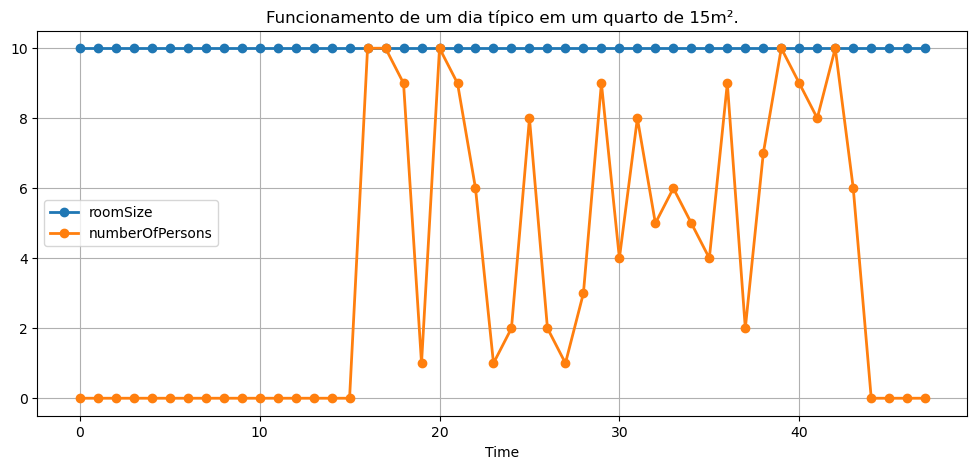

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))
ax.plot([i for i in range(0, 48)], X_room_size, label='roomSize', linewidth=2, marker='o')
ax.plot([i for i in range(0, 48)], Y_number_person, label='numberOfPersons', linewidth=2, marker='o')
ax.set_xlabel('Time')
ax.set_title('Funcionamento de um dia típico em um quarto de 15m².')
ax.grid()
ax.legend()

In [86]:
data_simu = pd.DataFrame(index=[i for i in range(0, 48)], columns=['roomSize', 'numberOfPersons', 'atmosphericTemperature'])
data_simu['roomSize'] = X_room_size
data_simu['numberOfPersons'] = Y_number_person
data_simu['atmosphericTemperature'] = [30 for i in range(0, 48)]

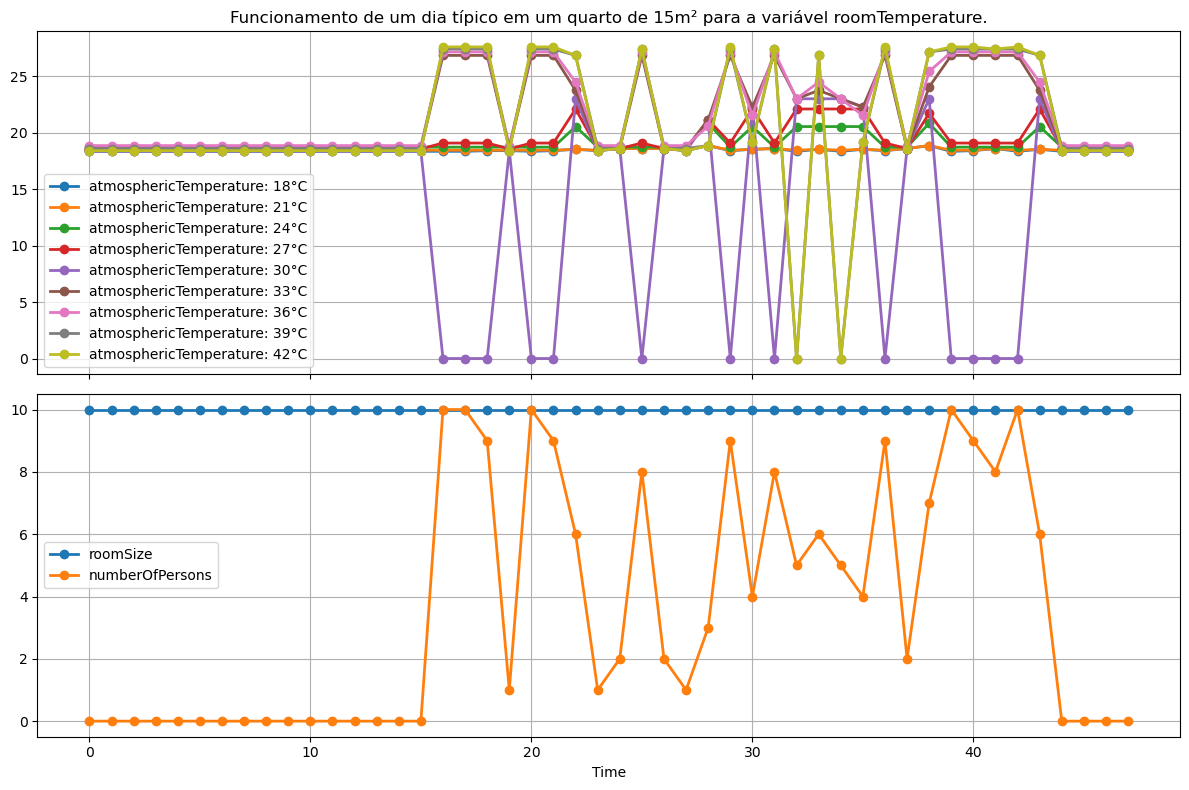

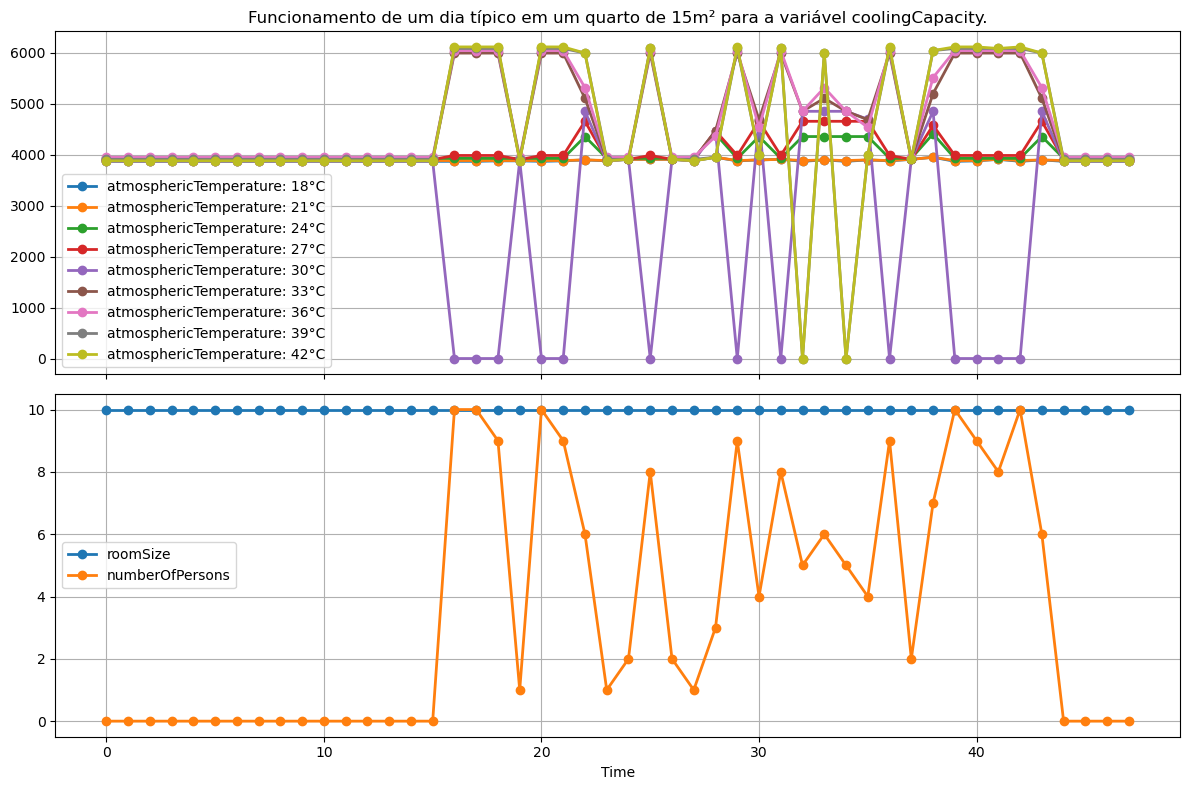

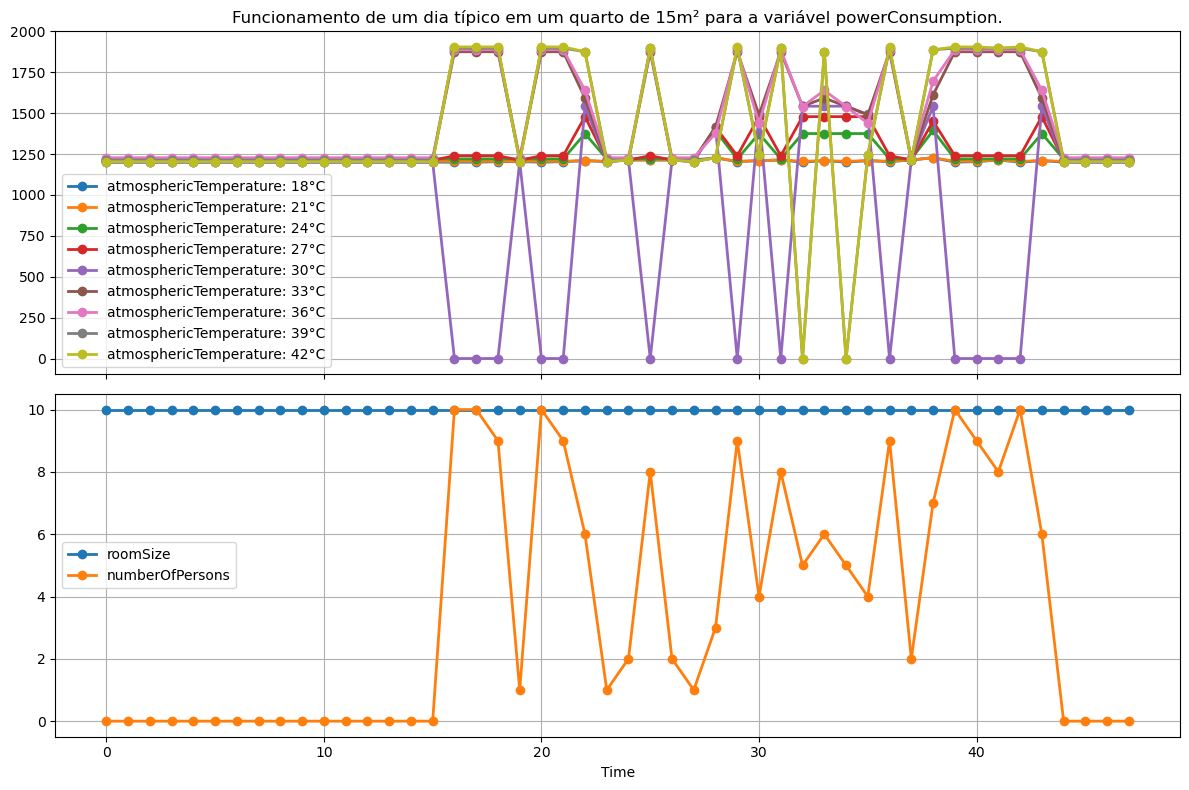

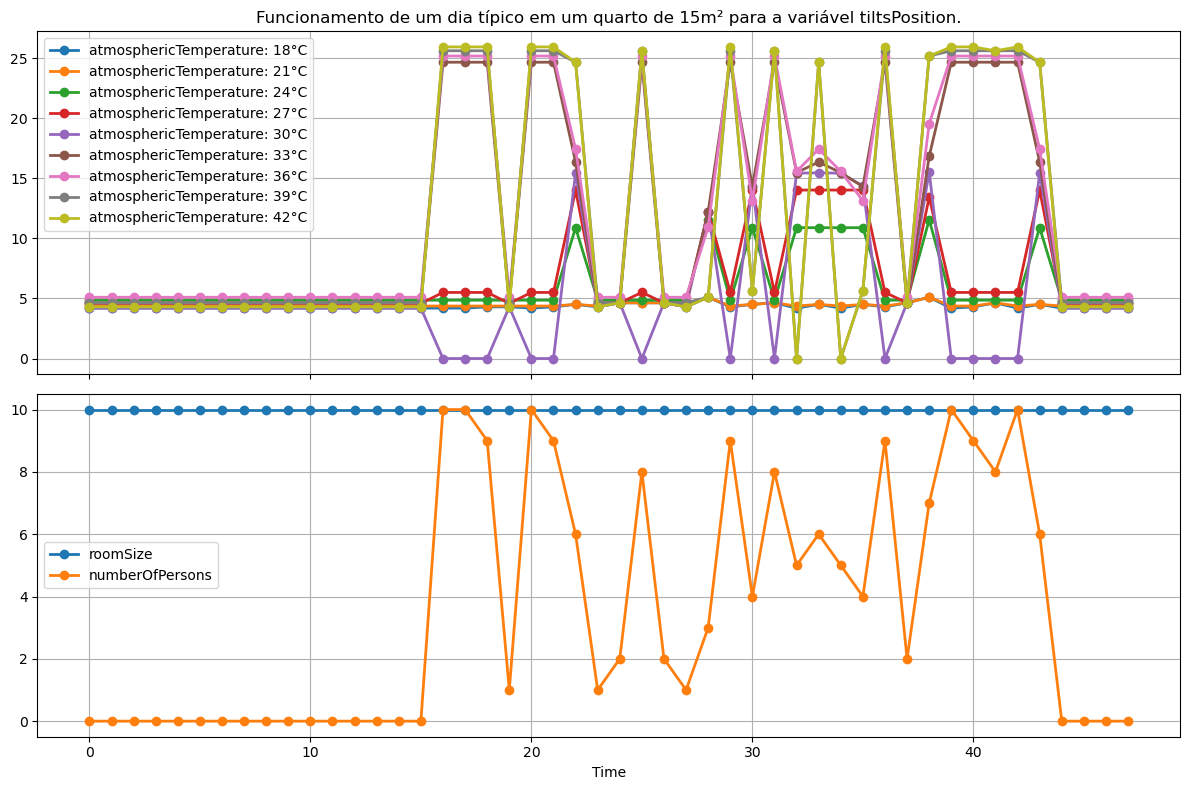

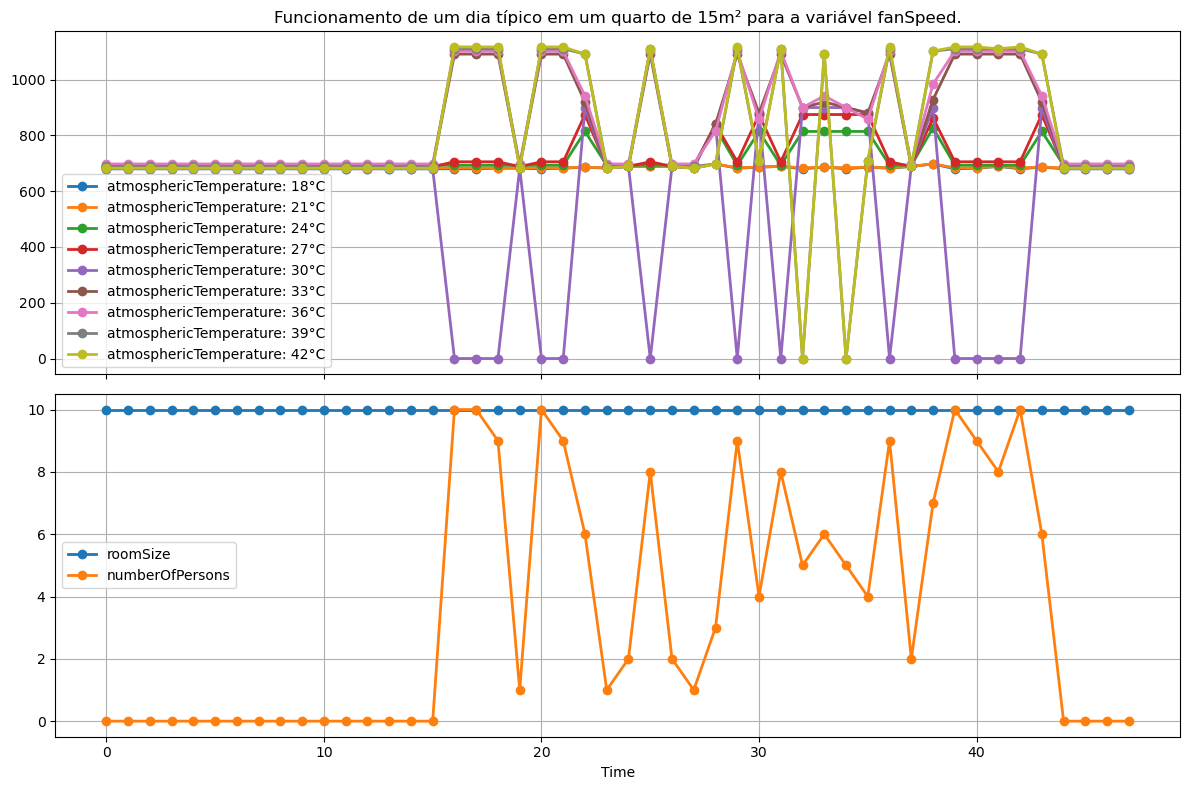

In [87]:
for output in outputs.keys():
    aux_FS = sf.FuzzySystem(show_banner=False)
    aux_FS.add_linguistic_variable("numberOfPersons", LV=numberOfPersons)
    aux_FS.add_linguistic_variable("roomSize", LV=roomSize)
    aux_FS.add_linguistic_variable("atmosphericTemperature", LV=atmosphericTemperature)
    aux_FS.add_linguistic_variable(output, LV=outputs[output])
    
    aux_rules = list()
    for i, row in regras.iterrows():
        aux_rules.append(
            f"IF (numberOfPersons IS {row['NUMBEROFPERSON']}) AND (roomSize IS {row['ROOMSIZE']}) AND (atmosphericTemperature IS {row['ATMOSSPHERICTEMPERATURE']}) THEN ({output} IS {row[output.upper()]})"
        )
    aux_FS.add_rules(aux_rules)

    fig, axs = plt.subplots(2, 1, figsize=(12,8), sharex=True)
    
    for value_at_temp in Y_atmospheric_temperature:
        Z_decisao = list()
        aux_FS.set_variable('atmosphericTemperature', value_at_temp)
        
        for j in range(Y_len_number_person):
            aux_FS.set_variable('roomSize', X_room_size[j])
            aux_FS.set_variable('numberOfPersons', Y_number_person[j])
            if value_at_temp == 30:
                data_simu.at[j, output] = aux_FS.Mamdani_inference(subdivisions=1000, ignore_warnings=True)[output]
            Z_decisao.append(aux_FS.Mamdani_inference(subdivisions=1000, ignore_warnings=True)[output])
        
        axs[0].plot(
            [i for i in range(0, 48)],
            Z_decisao,
            label=f'atmosphericTemperature: {value_at_temp}°C',
            linewidth=2,
            marker='o'
        )

    axs[1].plot([i for i in range(0, 48)], X_room_size, label='roomSize', linewidth=2, marker='o')
    axs[1].plot([i for i in range(0, 48)], Y_number_person, label='numberOfPersons', linewidth=2, marker='o')
    axs[1].set_xlabel('Time')
    axs[0].set_title(f'Funcionamento de um dia típico em um quarto de 15m² para a variável {output}.')
    axs[0].grid()
    axs[1].grid()
    axs[0].legend()
    axs[1].legend()
    plt.tight_layout()
    plt.savefig(
        f"./images/q03/{output}.png",
        format='png',
        bbox_inches='tight'
    )